In [1]:
versioninfo()

Julia Version 1.6.2
Commit 1b93d53fc4 (2021-07-14 15:36 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: AMD Ryzen 9 3900X 12-Core Processor
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, znver2)
Environment:
  JULIA_PKG_SERVER = pkg.julialang.org


In [2]:
using Revise, GaitSymmetry, Random, Statistics, ProgressMeter, Dates
includet("../src/powersim.jl")

In [ ]:
let
    U = Float32

    maxratio, step, = 2, 25//100
    ratios = reflect(1//1:step:maxratio//1)
    vars = 10. .^ (-2:.25:0)
    metrics = [Sel86, Rob87, Vag92, Plo05, abs(Plo05), Zif08, Roc14, abs(Roc14), Que20, Alv20, Alv20b]
    Ns = [10, 15, 25, 50, 100];
    @show length(metrics)*length(ratios)*length(vars)*length(Ns);

    @time powersim(metrics, ratios, vars, Ns, 10^3, Float32);
end

## Run Simulation

In [3]:
U = Float32
Random.seed!(0xFEEDBEEF)

MersenneTwister(4276993775)

In [3]:
batches = 20
samples = 5*(10^5)
maxratio, step, = 5, 1//10
ratios = reflect(1//1:step:maxratio//1)
vars = 10. .^ (-2:.1:0)
Ns = [10, 15, 25, 35, 50, 75, 100]
# metrics=[Ratio, Rob87, Vag92, Plo05, Zif08, Roc14, Que20, Alv20, Alv20b]
metrics = [Sel86, Rob87, Vag92, Plo05, abs(Plo05), Zif08, Roc14, abs(Roc14), Que20, Alv20, Alv20b]
fullSize = length(metrics)*length(ratios)*length(vars)*length(Ns)
power = zeros(length(Ns), length(metrics), length(ratios), length(vars))
@show ratios vars Ns fullSize;

ratios = Rational{Int64}[1//5, 10//49, 5//24, 10//47, 5//23, 2//9, 5//22, 10//43, 5//21, 10//41, 1//4, 10//39, 5//19, 10//37, 5//18, 2//7, 5//17, 10//33, 5//16, 10//31, 1//3, 10//29, 5//14, 10//27, 5//13, 2//5, 5//12, 10//23, 5//11, 10//21, 1//2, 10//19, 5//9, 10//17, 5//8, 2//3, 5//7, 10//13, 5//6, 10//11, 1//1, 11//10, 6//5, 13//10, 7//5, 3//2, 8//5, 17//10, 9//5, 19//10, 2//1, 21//10, 11//5, 23//10, 12//5, 5//2, 13//5, 27//10, 14//5, 29//10, 3//1, 31//10, 16//5, 33//10, 17//5, 7//2, 18//5, 37//10, 19//5, 39//10, 4//1, 41//10, 21//5, 43//10, 22//5, 9//2, 23//5, 47//10, 24//5, 49//10, 5//1]
vars = [0.01, 0.012589254117941675, 0.015848931924611134, 0.0199526231496888, 0.025118864315095794, 0.03162277660168379, 0.039810717055349734, 0.05011872336272723, 0.06309573444801933, 0.07943282347242814, 0.1, 0.12589254117941673, 0.15848931924611132, 0.19952623149688797, 0.251188643150958, 0.31622776601683794, 0.3981071705534972, 0.5011872336272722, 0.6309573444801932, 0.7943282347242815, 1.0]
Ns

In [7]:
let maxratio = 2, step = 25//100, ratios = reflect(1//1:step:maxratio//1)
    t = @elapsed powersim(metrics, ratios, vars, Ns, samples, Float32)
    tper = t / (length(metrics)*length(ratios)*length(vars)*length(Ns))
    tlen = round(Int, tper*fullSize*1e3)*batches
    print("Simulation time estimate: ", Dates.format(convert(DateTime, Millisecond(tlen)), dateformat"H hr, MM \min, SS \s\ec"))
end

Batch  1 progress: 100%|████████████████████████████████| Time: 0:04:57


Simulation time estimate: 14 hr, 51 min, 35 sec

In [9]:
t1 = time()
for batch in 1:batches
    power += powersim(metrics, ratios, vars, Ns, samples, Float32; batch)
    GC.gc()
end
power ./= batches*samples
t2 = time()
println("Total simulation time: ", Dates.format(convert(DateTime, Millisecond(round(Int, t2 - t1)*10^3)), dateformat"H hr, MM \min, SS \s\ec"))

Batch  1 progress: 100%|████████████████████████████████| Time: 0:40:12
Batch  2 progress: 100%|████████████████████████████████| Time: 0:40:22
Batch  3 progress: 100%|████████████████████████████████| Time: 0:40:15
Batch  4 progress: 100%|████████████████████████████████| Time: 0:40:13
Batch  5 progress: 100%|████████████████████████████████| Time: 0:40:19
Batch  6 progress: 100%|████████████████████████████████| Time: 0:40:16
Batch  7 progress: 100%|████████████████████████████████| Time: 0:40:07
Batch  8 progress: 100%|████████████████████████████████| Time: 0:40:12
Batch  9 progress: 100%|████████████████████████████████| Time: 0:40:14
Batch 10 progress: 100%|████████████████████████████████| Time: 0:40:19
Batch 11 progress: 100%|████████████████████████████████| Time: 0:40:17
Batch 12 progress: 100%|████████████████████████████████| Time: 0:40:17
Batch 13 progress: 100%|████████████████████████████████| Time: 0:40:18
Batch 14 progress: 100%|████████████████████████████████| Time: 

Total simulation time: 13 hr, 25 min, 10 sec


In [10]:
using PrettyTables, HDF5, Dates

In [11]:
h5open("powersimulation-results.h5", "cw") do file
    results = create_group(file, "powersim-"*Dates.format(now(), "Y-u-ddTHH:MM"))
    parameters = create_group(results, "parameters")
    parameters["metrics"] = string.(metrics)
    parameters["samples"] = samples
    parameters["maxratio"] = maxratio
    parameters["step"] = float(step)
    parameters["vars"] = vars
    parameters["Ns"] = collect(Ns)
    parameters["batches"] = batches
    
    results["results"] = power
end;

## Analysis

In [4]:
using PrettyTables, HDF5, Dates, DataFrames, PlotlyJS, Query, Interact, Images, FileIO

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-11286979943226457425\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-16358839176315183010\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-11286979943226457425\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [5]:
function mostrecentsim(fid)
    k = keys(fid)
    i = argmax(DateTime.(view.(k, Ref(10:26)), "Y-u-ddTHH:MM"))
    return fid[k[i]]
end

mostrecentsim (generic function with 1 method)

In [6]:
fid = h5open("powersimulation-results.h5")
sort(collect(keys(fid)); by=(x->DateTime(view(x, 10:26), "Y-u-ddTHH:MM")), rev=true)

11-element Vector{String}:
 "powersim-2021-Jul-31T09:09"
 "powersim-2021-Jul-28T00:03"
 "powersim-2021-May-12T18:10"
 "powersim-2021-May-12T18:09"
 "powersim-2021-Apr-26T10:02"
 "powersim-2021-Apr-25T11:24"
 "powersim-2021-Apr-23T15:14"
 "powersim-2021-Apr-23T12:27"
 "powersim-2021-Apr-20T21:17"
 "powersim-2021-Apr-20T13:33"
 "powersim-2021-Apr-20T13:32"

In [7]:
sim = mostrecentsim(fid)

samples  = read(sim, "parameters/samples")
maxratio = read(sim, "parameters/maxratio")
step     = read(sim, "parameters/step")
# ratios = reflect(1//1:step:maxratio//1)
vars     = read(sim, "parameters/vars")
Ns       = read(sim, "parameters/Ns")
batches  = read(sim, "parameters/batches")

h5open("powersimulation-results.h5") do io
last_power = read(io, "powersim-2021-Apr-26T10:02/results")
end
power    = read(sim, "results");

In [8]:
sim

📂 HDF5.Group: /powersim-2021-Jul-31T09:09 (file: powersimulation-results.h5)
├─ 📂 parameters
│  ├─ 🔢 Ns
│  ├─ 🔢 batches
│  ├─ 🔢 maxratio
│  ├─ 🔢 metrics
│  ├─ 🔢 samples
│  ├─ 🔢 step
│  └─ 🔢 vars
└─ 🔢 results

In [9]:
close(fid)

## Reductions

In [10]:
table = DataFrame(vec([ (;N, metric, ratio, var) for N in Ns, metric in metrics, ratio in ratios, var in vars]))
table.power = vec(power)
describe(table)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Union…,Union…,Union…,Int64,DataType
1,N,44.2857,10,35.0,100,0,Int64
2,metric,,,,,0,Any
3,ratio,,1//5,1.0,5//1,0,Rational{Int64}
4,var,0.22969,0.01,0.1,1.0,0,Float64
5,power,0.930607,0.0211891,1.0,1.0,0,Float64


In [11]:
null = @from obs in table begin
    @where obs.ratio == 1//1 && obs.metric !== Ratio
    @orderby obs.power
    @select obs
    @collect DataFrame
end
describe(null)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Union…,Union…,Union…,Int64,DataType
1,N,44.2857,10,35.0,100,0,Int64
2,metric,,,,,0,Any
3,ratio,1//1,1//1,1.0,1//1,0,Rational{Int64}
4,var,0.22969,0.01,0.1,1.0,0,Float64
5,power,0.0491186,0.0211891,0.0499082,0.0512956,0,Float64


In [12]:
inv1(x) = x < 1 ? inv(x) : x
dotonly(x) = only.(x)

dotonly (generic function with 1 method)

In [13]:
powered = @from obs in table begin
    @where obs.ratio != 1//1 && obs.power ≥ .8
    @group obs.power by (;obs.metric, obs.N, obs.var, ratio=inv1(obs.ratio)) into g1 # Combine ratios of same magnitude
    @let obs2 = (;key(g1).metric, key(g1).N, key(g1).var, key(g1).ratio, power=mean(g1)) # and average the power
    @orderby obs2.ratio
    # @select obs2
    @group (;obs2.ratio, obs2.power) by (;obs2.metric, obs2.N, obs2.var) into g2 # Group power for sets of metric, N, and var, but also keep the ratio cuz thats what we want
    @let obs3 = (;key(g2).metric, key(g2).N, key(g2).var, ratio=float(first(g2).ratio)) # Grab ratio of the first element, which will be the first ratio above 0.8 (according to preceding @orderby)
    @orderby obs3.N
#     @select obs3
    @group (;obs3.N) by (;obs3.var, obs3.metric, obs3.ratio) into g3 # Group all N for matching sets of metric, var, and ratio
    @let obs4 = (;key(g3).metric, first(g3).N, key(g3).var, key(g3).ratio) # Keep only the minimum N
    @orderby obs4.var, obs4.ratio#, obs3.N
    @select obs4
#     @group (;obs4.metric) by (;obs4.N, obs4.var, obs4.ratio) into g4
#     @let obs5 = (;g4.metric, key(g4).N, key(g4).var, key(g4).ratio)
#     @select obs5
    @collect DataFrame
    end;

In [14]:
function padones(x)
    o = ones(length(Ns))
    o[eachindex(x)] .= x
end

ranked = @from obs in powered begin
    @let rad = hypot(obs.N/100, obs.ratio/5)
    @group rad by (;obs.metric, obs.var) into g
    @let obs2 = (key(g).metric, key(g).var, rad=mean(padones(g)), len=length(g))
#     @orderby descending(obs2.len)
#     @select obs2
    @group obs2.rad by (;obs2.metric) into g2
    @let obs3 = (key(g2).metric, rad=mean(g2))
    @orderby obs3.rad
    @select obs3
    @collect DataFrame
end

,metric,rad
,Any,Any
1,Roc14,0.355374
2,Alv20b,0.361171
3,Alv20,0.371733
4,Zif08,0.372024
5,Vag92,0.372025
6,Que20,0.372025
7,Rob87,0.377004
8,Plo05,0.384445
9,_abs_Roc14,0.410095


In [15]:
mtrcnames = Dict( string(mtrc) => mtrc == GaitSymmetry._abs_Plo05 ? "abs(Plo05)" :
                                  mtrc == GaitSymmetry._abs_Roc14 ? "abs(Roc14)" : string(mtrc)
                for mtrc in metrics )

Dict{String, String} with 11 entries:
  "Alv20b"     => "Alv20b"
  "_abs_Plo05" => "abs(Plo05)"
  "Que20"      => "Que20"
  "Sel86"      => "Sel86"
  "Alv20"      => "Alv20"
  "Zif08"      => "Zif08"
  "Roc14"      => "Roc14"
  "Plo05"      => "Plo05"
  "Rob87"      => "Rob87"
  "Vag92"      => "Vag92"
  "_abs_Roc14" => "abs(Roc14)"

In [17]:
let
    @manipulate for var in vars, N in Ns
        plot([ scatter(;x=table |> @filter(_.metric == mtrc && _.var == var && _.N == N) |> @select(:ratio) |> dotonly,
                y=table |> @filter(_.metric == mtrc && _.var == var && _.N == N) |> @select(:power) |> dotonly,
                name=mtrcnames[string(mtrc)],
                )
            for mtrc in metrics ],
            Layout(;
                xaxis_range=[1,5],
                yaxis_range=[0,1],
                width=800,
                height=600,
            )
        )
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["var"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\allen\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\allen\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\allen\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\allen\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\allen\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000074f968c0, Task (runnable) @0x0000000074f968c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.01\",\"0.0125893\",\"0.0158489\",\"0.0199526\",\"0.0251189\",\"0.0316228\",\"0.0398107\",\"0.0501187\",\"0.0630957\",\"0.0794328\",\"0.1\",\"0.125893\",\"0.158489\",\"0.199526\",\"0.251189\",\"0.316228\",\"0.398

In [141]:
@manipulate for v in vars#N in Ns
# let N = 10
    plot([
        scatter(;x=powered |> @filter(_.metric == mtrc && _.var == v) |> @select(:ratio) |> dotonly,
            y=powered |> @filter(_.metric == mtrc && _.var == v) |> @select(:N) |> dotonly,
            name=mtrcnames[string(mtrc)], mode="markers+lines")
        for mtrc in metrics
    ], Layout(;
        legend_orientation='h',
        width=600,
        height=600,
        yaxis=attr(;
#             title="Variation (SD, %)",
#             range=[0,1.05],
            title="N (sample size)",
            range=[4,101],
        ),
        xaxis=attr(;
            title="Ratio",
            range=[1,5],
#             scaleanchor='y',
#             scaleratio=1.05/4,
        ),
        
    ))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["v"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/allen/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/allen/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/allen/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/home/allen/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/home/allen/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fb0f21f2620, Task (runnable) @0x00007fb0f21f2620), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.01\",\"0.0125893\",\"0.0158489\",\"0.0199526\",\"0.0251189\",\"0.0316228\",\"0.0398107\",\"0.0501187\",\"0.0630957\",\"0.0794328\",\"0.1\",\"0.125893\",\"0.158489\",\"0.199526\",\"0.251189\",\"0.316228\",\"0.398107\",\"0.501187\",\"0.630957\",\"0.794328\",\"1.0\"],\"changes\":W

### Figure code for manuscript

In [16]:
mtrclins = Dict(
    abs(Plo05) => attr(;color="#45a9b0", dash="dash"),
    Roc14 => attr(;color="#a4dbe0"),
    abs(Roc14) => attr(;color="#a4dbe0", dash="dash"),
    :band => attr(;color="#7A7A7A"),
    Sel86 => attr(;color="#66923a"),
    Alv20b => attr(;color="#d03939", dash="dash")
)

Dict{Any, PlotlyBase.PlotlyAttribute{Dict{Symbol, Any}}} with 6 entries:
  _abs_Plo05 => PlotlyAttribute{Dict{Symbol, Any}}(Dict{Symbol, Any}(:color=>"#…
  :band      => PlotlyAttribute{Dict{Symbol, Any}}(Dict{Symbol, Any}(:color=>"#…
  Roc14      => PlotlyAttribute{Dict{Symbol, Any}}(Dict{Symbol, Any}(:color=>"#…
  Sel86      => PlotlyAttribute{Dict{Symbol, Any}}(Dict{Symbol, Any}(:color=>"#…
  Alv20b     => PlotlyAttribute{Dict{Symbol, Any}}(Dict{Symbol, Any}(:color=>"#…
  _abs_Roc14 => PlotlyAttribute{Dict{Symbol, Any}}(Dict{Symbol, Any}(:color=>"#…

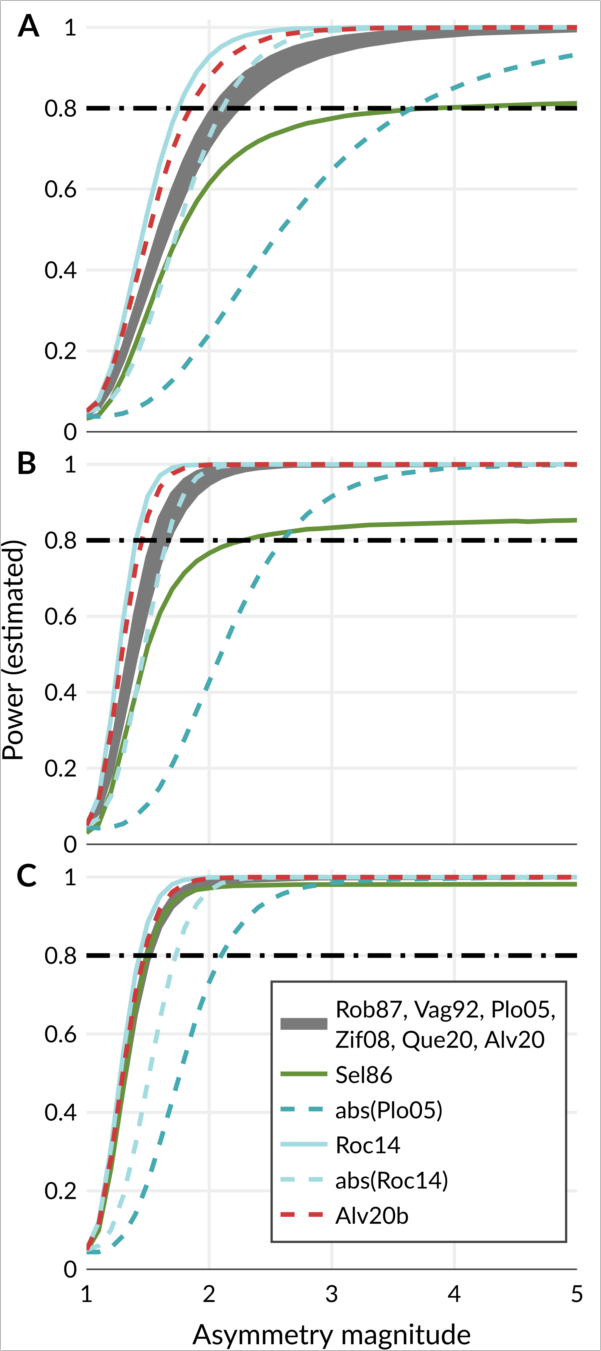

In [17]:
let w=4, orig_dpi=96, print_dpi=600, scale=print_dpi/orig_dpi, metrics=[Sel86,:band,abs(Plo05),Roc14,abs(Roc14),Alv20b]
    gridwidth = 2
    line_width = 3
    yax_base = attr(;
        title="Power (estimated)",
        range=[0,1.02],
        nticks=6,
        gridwidth,
        automargin=true,)
    annbase = attr(;
        font_size=20,
        showarrow=false,
        xref="paper",
        x=-0.15,
        yanchor="middle",
        y=1,
    )
    
    traces = GenericTrace{Dict{Symbol, Any}}[]
    for (N, v, ax, flag) in zip(Ns[[2,4,2]], vars[[18,18,16]], ("y1","y2","y3"), (true, false, false))
        band = @from obs in table begin
            @where obs.metric ∈ (Rob87,Vag92,Plo05,Zif08,Que20,Alv20) && obs.var == v && obs.N == N
            @group obs.power by (;obs.metric, ratio=inv1(obs.ratio)) into g
            @let obs2 = (;key(g).metric, key(g).ratio, power=mean(g))
            @orderby obs2.ratio
            @group obs2.power by (;obs2.ratio) into g2
            @select {key(g2).ratio, min=minimum(g2), max=maximum(g2)}
            @collect DataFrame
        end
        push!(traces,
            scatter(;x=vcat(ratios[ratios .≥ 1], reverse(ratios[ratios .≥ 1])),
                y=vcat(band[!,:max], reverse(band[!,:min])),
                name="Rob87, Vag92, Plo05,<br>Zif08, Que20, Alv20", legendgroup="band", line=mtrclins[:band], line_width, legendrank=2,
                yaxis=ax, showlegend=flag, fill="toself", fillcolor="#7A7A7A"))
    end
    
    append!(traces, [
        [scatter(;x=ratios[ratios .≥ 1],
                y=table |> @filter(_.metric == mtrc && _.var == v && _.N == N && _.ratio ≥ 1) |> @orderby(:ratio) |> @select(:power) |> dotonly,
                name=mtrcnames[string(mtrc)], legendrank=i, legendgroup=mtrcnames[string(mtrc)], line=mtrclins[mtrc], line_width,
                yaxis="y1")
            for (i, mtrc) in enumerate(metrics) for (N, v) in zip(Ns[2], vars[18]) if mtrc !== :band];
        [scatter(;x=ratios[ratios .≥ 1],
                y=table |> @filter(_.metric == mtrc && _.var == v && _.N == N && _.ratio ≥ 1) |> @orderby(:ratio) |> @select(:power) |> dotonly,
                name=mtrcnames[string(mtrc)], legendrank=i, legendgroup=mtrcnames[string(mtrc)], line=mtrclins[mtrc], line_width,
                yaxis="y2", showlegend=false,)
            for (i, mtrc) in enumerate(metrics) for (N, v) in zip(Ns[4], vars[18]) if mtrc !== :band];
        [scatter(;x=ratios[ratios .≥ 1],
                y=table |> @filter(_.metric == mtrc && _.var == v && _.N == N && _.ratio ≥ 1) |> @orderby(:ratio) |> @select(:power) |> dotonly,
                name=mtrcnames[string(mtrc)], legendrank=i, legendgroup=mtrcnames[string(mtrc)], line=mtrclins[mtrc], line_width,
                yaxis="y3", showlegend=false,)
            for (i, mtrc) in enumerate(metrics) for (N, v) in zip(Ns[2], vars[16]) if mtrc !== :band]])
    
    p = plot(traces,
        Layout(;
            width=round(Int, w*orig_dpi),
            height=round(Int, (w/1.333333*3)*orig_dpi),
            margin=attr(;
                t=10,
                r=15,
                pad=5,
                autoexpand=false,
            ),
            font=attr(;
                family="Lato",
                size=15,
                color="#000"
            ),
            legend=attr(;
                xanchor="right",
                yanchor="bottom",
                y=.021,
                x=.98,
                borderwidth=1.5,
                tracegroupgap=0,
                traceorder="grouped",
            ),
            yaxis=attr(;
                yax_base...,
                domain=[0.67,1],
                title="",
            ),
            yaxis2=attr(;
                yax_base...,
                domain=[0.34,0.65],
                matches="y",
            ),
            yaxis3=attr(;
                yax_base...,
                domain=[0,0.32],
                title="",
                matches="y",
            ),
            xaxis=attr(;
                title="Asymmetry magnitude",
                range=[1,5],
                nticks=5,
                gridwidth,
                automargin=true,
                anchor="y3",
                zerolinewidth=gridwidth,
            ),
            shapes = [
                PlotlyJS.hline(0.8; yref="y3", line_width, line_dash="longdashdot"),
                PlotlyJS.hline(0.8; yref="y2", line_width, line_dash="longdashdot"),
                PlotlyJS.hline(0.8; yref="y1", line_width, line_dash="longdashdot"),
            ],
            annotations=[
                attr(;
                    annbase...,
                    text="<b>A</b>",
                    yref="y1",
                ),
                attr(;
                    annbase...,
                    text="<b>B</b>",
                    yref="y2",
                ),
                attr(;
                    annbase...,
                    text="<b>C</b>",
                    yref="y3",
                ),
            ]
        )
    )
    savefig(p, "../manuscript/Fig1.png"; width=round(Int, w*orig_dpi),
            height=round(Int, (w/1.333333*3)*orig_dpi), scale=600/96)
    load("../manuscript/Fig1.png")
end

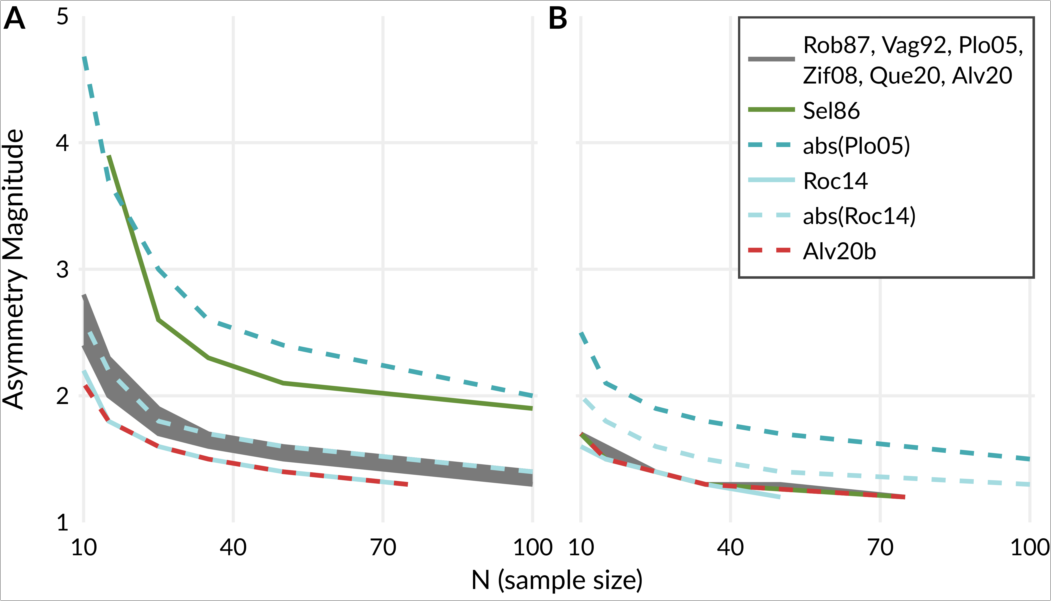

In [32]:
let w=7, orig_dpi=96, print_dpi=600, scale=print_dpi/orig_dpi, metrics=[Sel86,:band,abs(Plo05),Roc14,abs(Roc14),Alv20b]
    gridwidth = 2
    line_width = 3
    xax_base = attr(;
#         title=attr(;
#             text="Asymmetry magnitude",
#             standoff=5,
#         ),
        title="",
                range=[9,101],
                tickvals=[10,40,70,100],
        nticks=5,
        gridwidth,
        
#         automargin=true,
    )
    annbase = attr(;
        font_size=20,
        showarrow=false,
        yref="y1",
        yanchor="middle",
        y=5,
        xref="paper",
        borderpad=0,
        borderwidth=0,
        yshift=-2,
    )

    traces = GenericTrace{Dict{Symbol, Any}}[]
    
    
    let v = vars[18]
        qry = @from obs in powered begin
            @orderby obs.N
            @where obs.metric ∈ (Rob87,Vag92,Plo05,Zif08,Que20,Alv20) && obs.var == v
            @group obs.ratio by (;obs.N) into g
            @select {key(g).N, min=minimum(g), max=maximum(g)}
            @collect DataFrame
        end
        push!(traces, scatter(;y=qry[!,:min], x=qry[!,:N],
            name="Rob87, Vag92, Plo05,<br>Zif08, Que20, Alv20", legendgroup="band", legendrank=2, 
            line=mtrclins[:band], fill="none", fillcolor="#7A7A7A", mode="lines",  orientation='v',
            line_width, xaxis="x1", yaxis="y1", stackgroup="band", groupnorm=""))
        push!(traces, scatter(;y=qry[!,:max] .- qry[!,:min], x=qry[!,:N],
            name="Rob87, Vag92, Plo05,<br>Zif08, Que20, Alv20", legendgroup="band", legendrank=2, 
            line=mtrclins[:band], fill="tonexty", fillcolor="#7A7A7A", mode="lines", showlegend=false, orientation='v',
            line_width, xaxis="x1", yaxis="y1", stackgroup="band"))

    end
    let v = vars[16]
        qry = @from obs in powered begin
            @orderby obs.N
            @where obs.metric ∈ (Rob87,Vag92,Plo05,Zif08,Que20,Alv20) && obs.var == v
            @group obs.ratio by (;obs.N) into g
            @select {key(g).N, min=minimum(g), max=maximum(g)}
            @collect DataFrame
        end
        push!(traces, scatter(;y=[qry[!,:min]; reverse(qry[!,:max])], x=[qry[!,:N]; reverse(qry[!,:N])],
            name="Rob87, Vag92, Plo05,<br>Zif08, Que20, Alv20", legendgroup="band", legendrank=2, 
            line=mtrclins[:band], fill="toself", fillcolor="#7A7A7A", mode="lines", showlegend=false,
            line_width, xaxis="x2", yaxis="y1",))
    end
    
    
    let v = vars[18]
        for (i, mtrc) in enumerate(metrics) if mtrc !== :band
            qry = powered |> @filter(_.metric == mtrc && _.var == v)
            push!(traces, scatter(;y=qry |> @select(:ratio) |> dotonly,
                    x=qry |> @select(:N) |> dotonly,
                    name=mtrcnames[string(mtrc)], legendgroup=mtrcnames[string(mtrc)], legendrank=i, mode="lines", line=get(mtrclins, mtrc, attr()), line_width, xaxis="x1", yaxis="y1",))
        end; end
    end
    let v = vars[16]
        for mtrc in metrics if mtrc !== :band
            qry = powered |> @filter(_.metric == mtrc && _.var == v)
            push!(traces, scatter(;y=qry |> @select(:ratio) |> dotonly,
                    x=qry |> @select(:N) |> dotonly,
                    name=mtrcnames[string(mtrc)], legendgroup=mtrcnames[string(mtrc)], mode="lines", line=get(mtrclins, mtrc, attr()), showlegend=false, line_width, xaxis="x2", yaxis="y1",))
        end; end
    end    

    p = plot(traces, Layout(;
            width=round(Int, w*orig_dpi),
#             height=round(Int, (w/1.333333/2)*orig_dpi),
            height=round(Int, (4)*orig_dpi),
            margin=attr(;
                t=10,
                r=10,
                pad=5,
                b=50,
                autoexpand=true,
            ),
            font=attr(;
                family="Lato",
                size=15,
                color="#000"
            ),
            yaxis=attr(;
                title="Asymmetry Magnitude",
                gridwidth,
                range=[1,5],
                nticks=5,
#                 automargin=true,
            ),
            xaxis=attr(;
                xax_base...,
                domain=[0,0.48],
                scaleanchor="y1",
                scaleratio=100,
            ),
            xaxis2=attr(;
                xax_base...,
                domain=[0.52,1],
#                 title="",
                scaleanchor="y1",
                scaleratio=100,
            ),
            legend=attr(;
                xanchor="right",
                yanchor="top",
#                 orientation='h',
#                 y=-0.2,
                x=1,
                borderwidth=1.5,
                tracegroupgap=0,
            ),
            title=attr(;
                text="N (sample size)",
                font_size=17,
                xref="paper",
                xanchor="middle",
                x=0.5,
                yref="container",
                yanchor="top",
                y=0.05
            ),
            annotations=[
                attr(;
                    annbase...,
                    text="<b>A</b>",
                    x=-0.08
                ),
                attr(;
                    annbase...,
                    text="<b>B</b>",
                    x=0.5
                ),
            ],
        ); config=PlotConfig(;displayModeBar=false))
    savefig(p, "../manuscript/Fig2.png"; width=round(Int, w*orig_dpi),
            height=round(Int, 4*orig_dpi), scale=600/96)
    load("../manuscript/Fig2.png")
end

### Consistency

In [40]:
last_power = h5open("powersimulation-results.h5") do io
    read(io, "powersim-2021-Apr-25T11:24/results")
end;

In [41]:
_diff = abs.(power - last_power)
mi, avg, mx = minimum(_diff), mean(_diff), maximum(_diff)
@show mi avg mx;

mi = 0.0
avg = 9.580122640276958e-5
mx = 0.005207699999999982


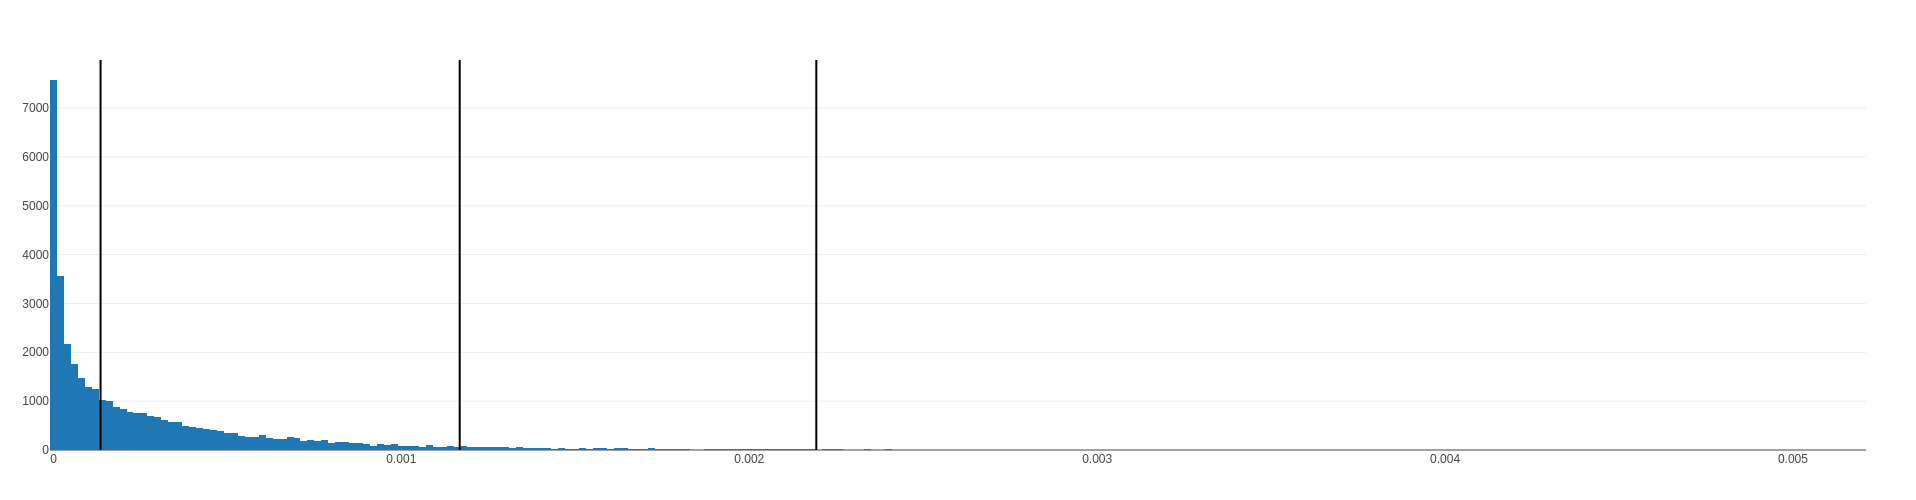

In [47]:
plot([
        histogram(;x=filter(!iszero, vec(_diff)))
        ], Layout(;shapes=PlotlyJS.vline(quantile(filter(!iszero, vec(_diff)), [.5,.95,.99]))))

In [44]:
diff_table = DataFrame(vec([ (;N, metric, ratio, var) for N in Ns, metric in metrics, ratio in ratios, var in vars]))
diff_table.power = vec(abs.(last_power - power))
describe(diff_table)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Union…,Union…,Union…,Int64,DataType
1,N,35.8889,5,25.0,100,0,Int64
2,metric,,,,,0,DataType
3,ratio,,1//5,1.0,5//1,0,Rational{Int64}
4,var,0.22969,0.01,0.1,1.0,0,Float64
5,power,9.58012e-5,0.0,0.0,0.0052077,0,Float64


In [45]:
diffs = @from obs in diff_table begin
    @where obs.power != 0
    @orderby descending(obs.power)
    @select obs
    @collect DataFrame
end;